In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import MSTL,AutoARIMA, SeasonalNaive, TBATS,OptimizedTheta,SeasonalExponentialSmoothingOptimized
import seaborn as sns
from datasetsforecast.losses import (
    mae, mape, mase, rmse, smape
)
import warnings 
warnings.filterwarnings('ignore') 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[StatsForecast](https://nixtlaverse.nixtla.io/statsforecast/index.html)

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,10)

In [3]:
path="daily-website-visitors.csv"
df = pd.read_csv(path)

In [4]:
df.head()

Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236

In [5]:
df.shape

(2167, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [7]:
df.columns = [col.replace(".","_") for col in df.columns]

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Page_Loads"] = df["Page_Loads"].replace(",", "",regex=True).astype("int16")
df["Unique_Visits"] = df["Unique_Visits"].replace(",", "",regex=True).astype("int16")
df["Day_Of_Week"] = df["Day_Of_Week"].astype("int16")
df["First_Time_Visits"] = df["First_Time_Visits"].str.replace(",", "",regex=True).astype("int16")
df["Returning_Visits"] = df["Returning_Visits"].str.replace(",", "",regex=True).astype("int16")
df.drop(columns="Row",inplace=True)

In [9]:
df.describe()

Day_Of_Week                 Date   Page_Loads  Unique_Visits  \
count  2167.000000                 2167  2167.000000    2167.000000   
mean      3.997231  2017-09-01 00:00:00  4116.989386    2943.646516   
min       1.000000  2014-09-14 00:00:00  1002.000000     667.000000   
25%       2.000000  2016-03-08 12:00:00  3114.500000    2226.000000   
50%       4.000000  2017-09-01 00:00:00  4106.000000    2914.000000   
75%       6.000000  2019-02-24 12:00:00  5020.500000    3667.500000   
max       7.000000  2020-08-19 00:00:00  7984.000000    5541.000000   
std       2.000229                  NaN  1350.977843     977.886472   

       First_Time_Visits  Returning_Visits  
count        2167.000000       2167.000000  
mean         2431.824181        511.822335  
min           522.000000        133.000000  
25%          1830.000000        388.500000  
50%          2400.000000        509.000000  
75%          3038.000000        626.500000  
max          4616.000000       1036.000000  
std           828.704688        168.736370

In [10]:
df.drop(columns="Day",inplace=True)

In [11]:
df.drop(columns="Day_Of_Week",inplace=True)

In [12]:
df.set_index("Date",inplace=True)
df.sort_index(inplace=True)

In [13]:
df_pl = df[["Page_Loads"]]
df_uv = df[["Unique_Visits"]]
df_ftv = df[["First_Time_Visits"]]
df_rv = df[["Returning_Visits"]]

In [14]:
df_pl.head()

Page_Loads
Date                  
2014-09-14        2146
2014-09-15        3621
2014-09-16        3698
2014-09-17        3667
2014-09-18        3316

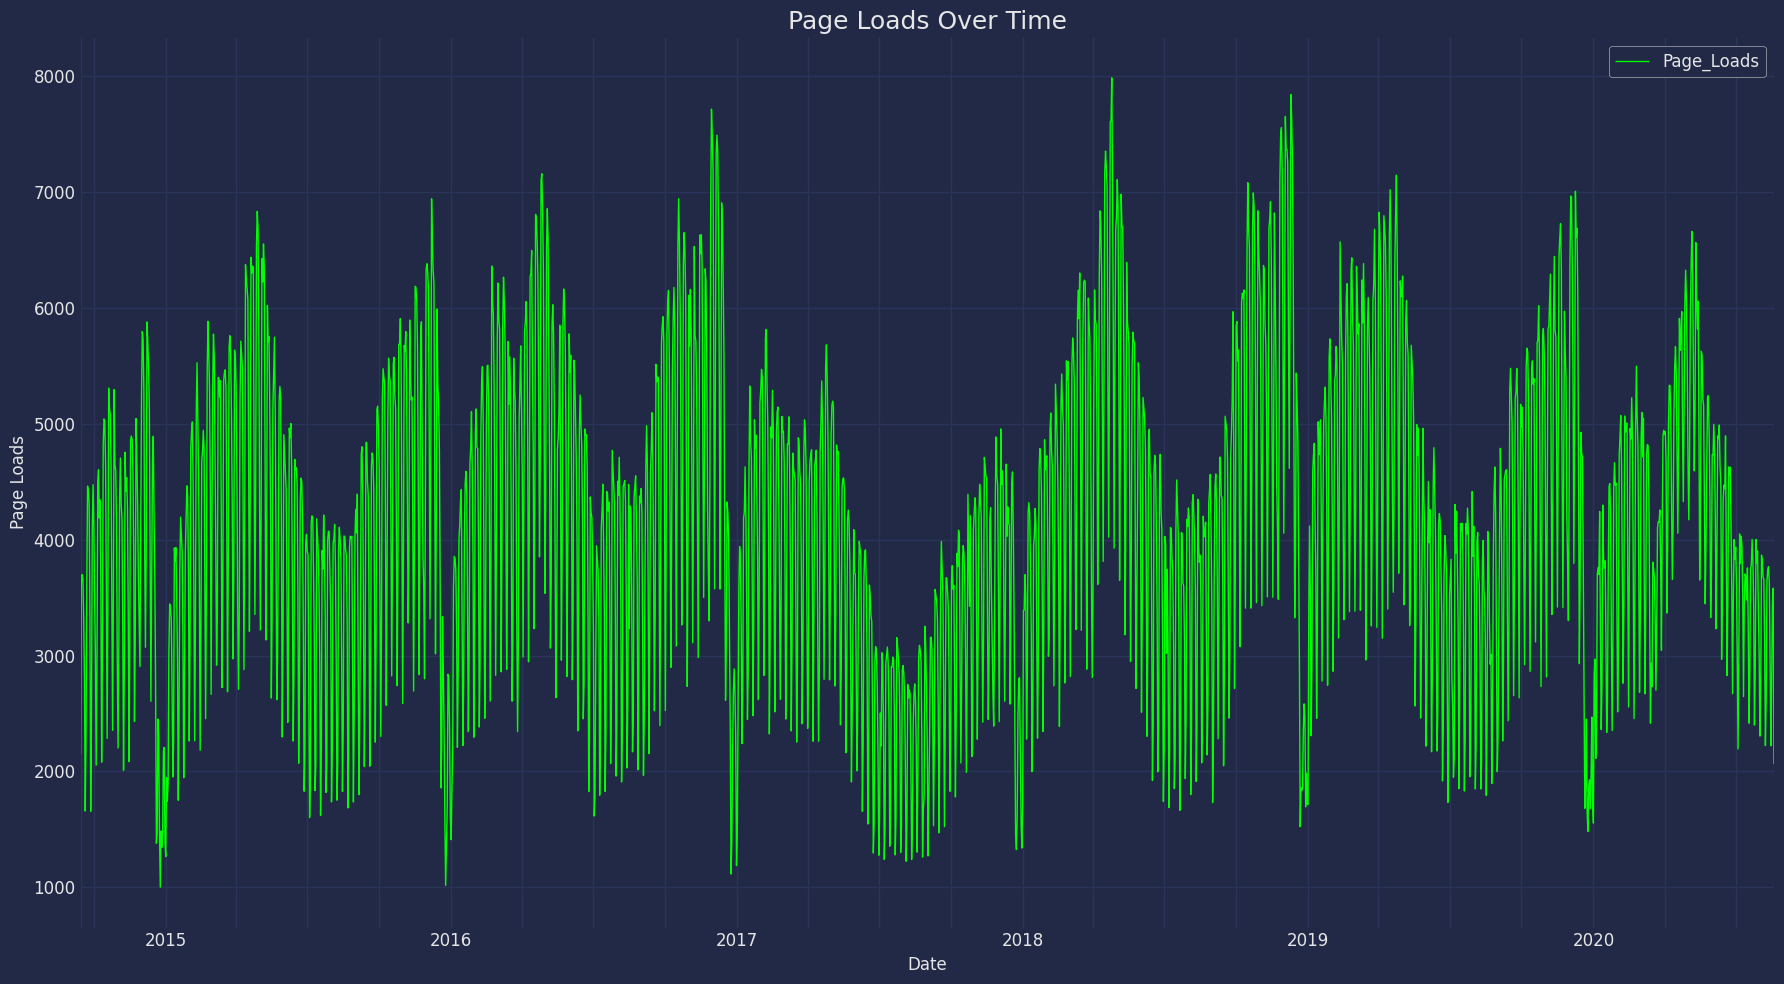

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))
df_pl.plot(ax=ax, color="lime", linestyle="-", linewidth=1, markersize=8)

ax.set_title("Page Loads Over Time", fontsize=18)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Page Loads", fontsize=12)
fig.tight_layout()
plt.show()

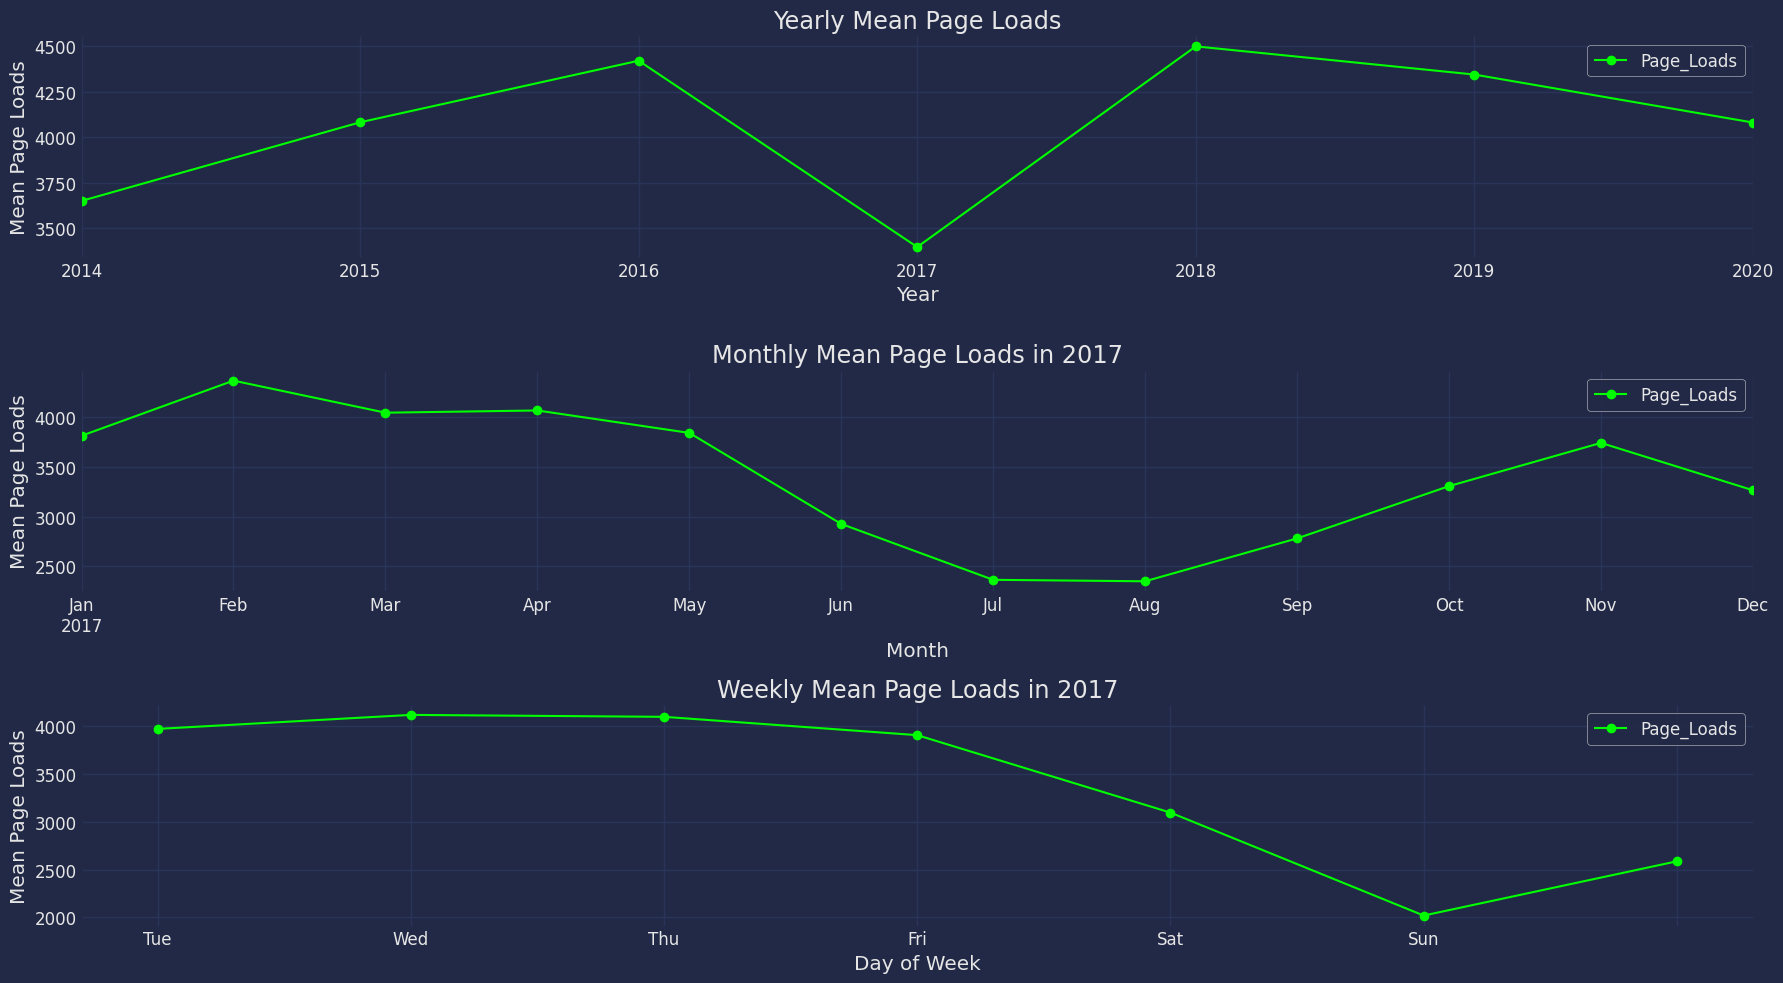

In [16]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))

df_pl.resample("A").mean().plot(marker="o", color="lime", ax=axes[0])
axes[0].set_title("Yearly Mean Page Loads")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Mean Page Loads")

df_pl["2017-01":"2017-12"].resample("M").mean().plot(marker="o", color="lime", ax=axes[1])
axes[1].set_title("Monthly Mean Page Loads in 2017")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Mean Page Loads")

a = df_pl["2017-01":"2017-12"].groupby(df_pl["2017-01":"2017-12"].index.dayofweek).mean()
a.plot(marker="o", color="lime", ax=axes[2])
axes[2].set_title("Weekly Mean Page Loads in 2017")
axes[2].set_xlabel("Day of Week")
axes[2].set_ylabel("Mean Page Loads")
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

#### Forecasting Page Loads

The input to StatsForecast is always a data frame in long format with three columns: *unique_id*, *ds* and *y*:

In [17]:
def transform_dataframe(df,target_column):
    df_transformed = df.reset_index()
    df_transformed.rename(columns={"Date": "ds", target_column: "y"}, inplace=True)
    df_transformed["unique_id"] = "1"
    return df_transformed

In [18]:
df_pl_transformed = transform_dataframe(df_pl,target_column="Page_Loads")

In [19]:
df_pl_transformed.head()

ds     y unique_id
0 2014-09-14  2146         1
1 2014-09-15  3621         1
2 2014-09-16  3698         1
3 2014-09-17  3667         1
4 2014-09-18  3316         1

In [20]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [21]:
Augmented_Dickey_Fuller_Test_func(df_pl_transformed["y"],"Ads")

Dickey-Fuller test results for columns: Ads
Test Statistic                   -4.283821
p-value                           0.000474
No Lags Used                     26.000000
Number of observations used    2140.000000
Critical Value (1%)              -3.433409
Critical Value (5%)              -2.862892
Critical Value (10%)             -2.567489
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [68]:
mstl = MSTL(
    season_length=[7,12], 
    trend_forecaster=AutoARIMA(),
)

In [69]:
sf = StatsForecast(
    models=[mstl], 
    freq="D", 
)

In [70]:
sf = sf.fit(df=df_pl_transformed)

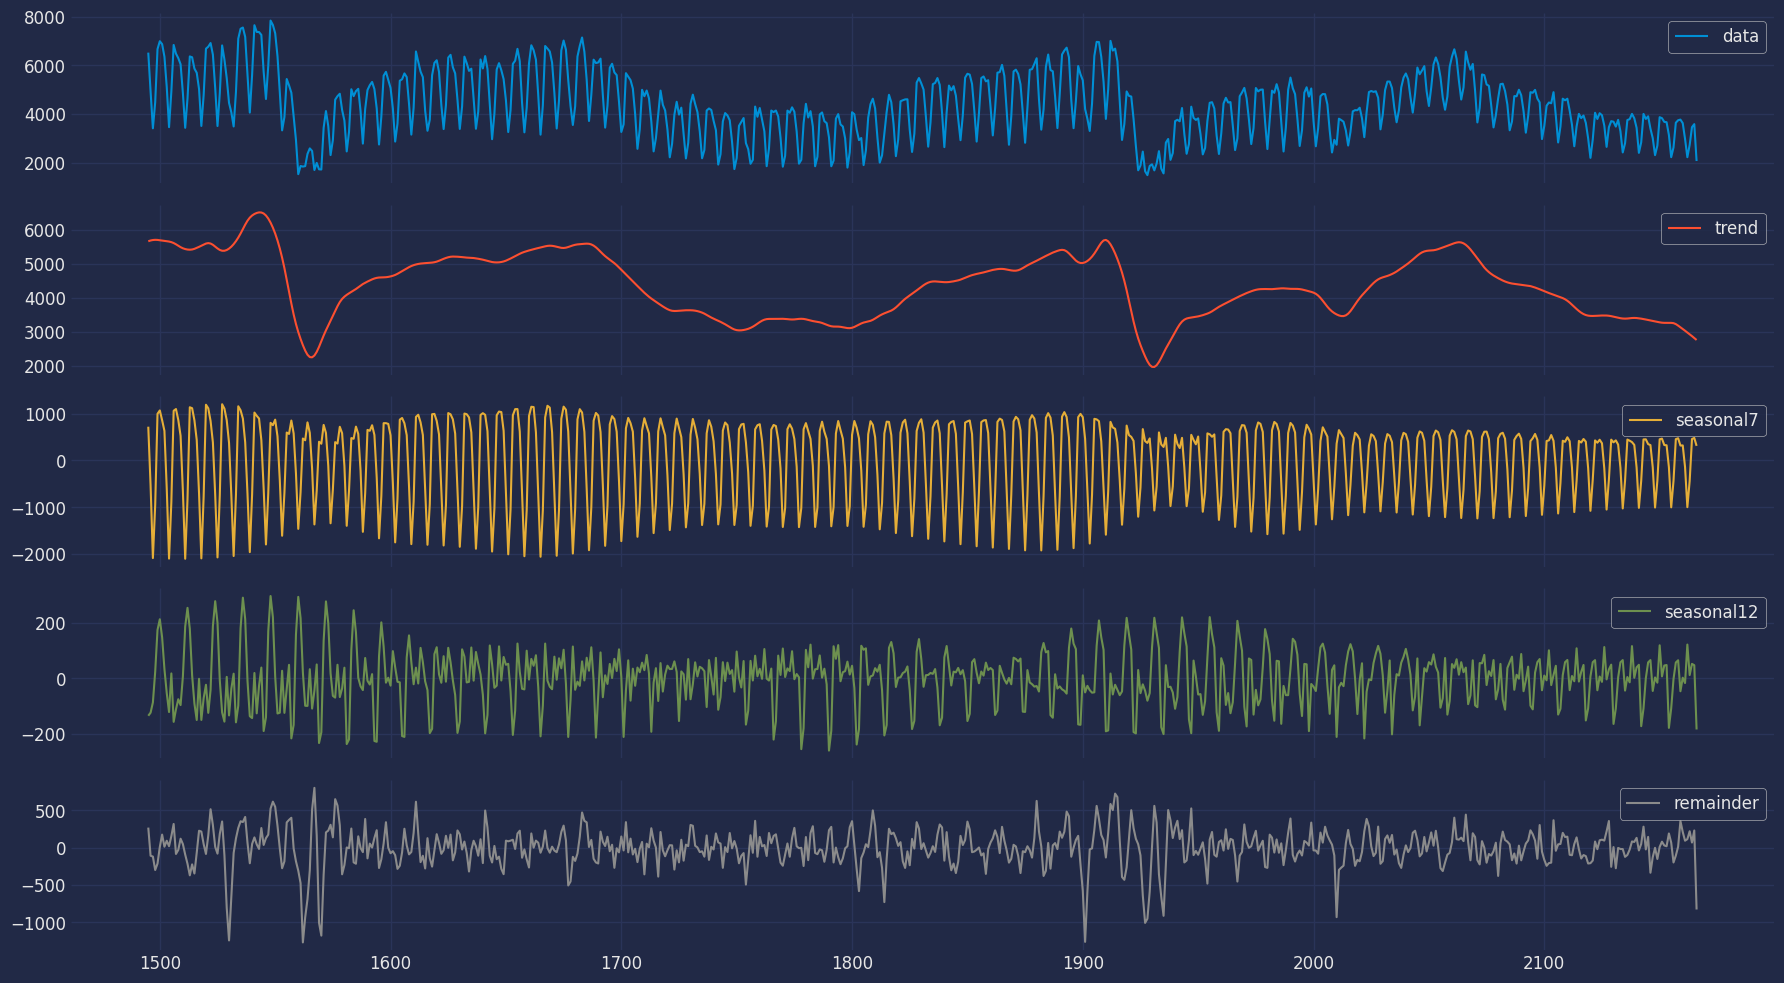

In [25]:
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True,)
plt.tight_layout()
plt.show()

In [26]:
def plot_forecasts(y_hist, y_true, y_pred, models,target_name):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how="left", on=["unique_id", "ds"])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(30*5)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2)
  
    ax.set_title(f"{target_name} Daily", fontsize=22)
    ax.set_ylabel(f"{target_name}", fontsize=20)
    ax.set_xlabel("Timestamp [t]", fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()

In [27]:
df_test = df_pl_transformed.tail(30)
df_train = df_pl_transformed.drop(df_test.index)

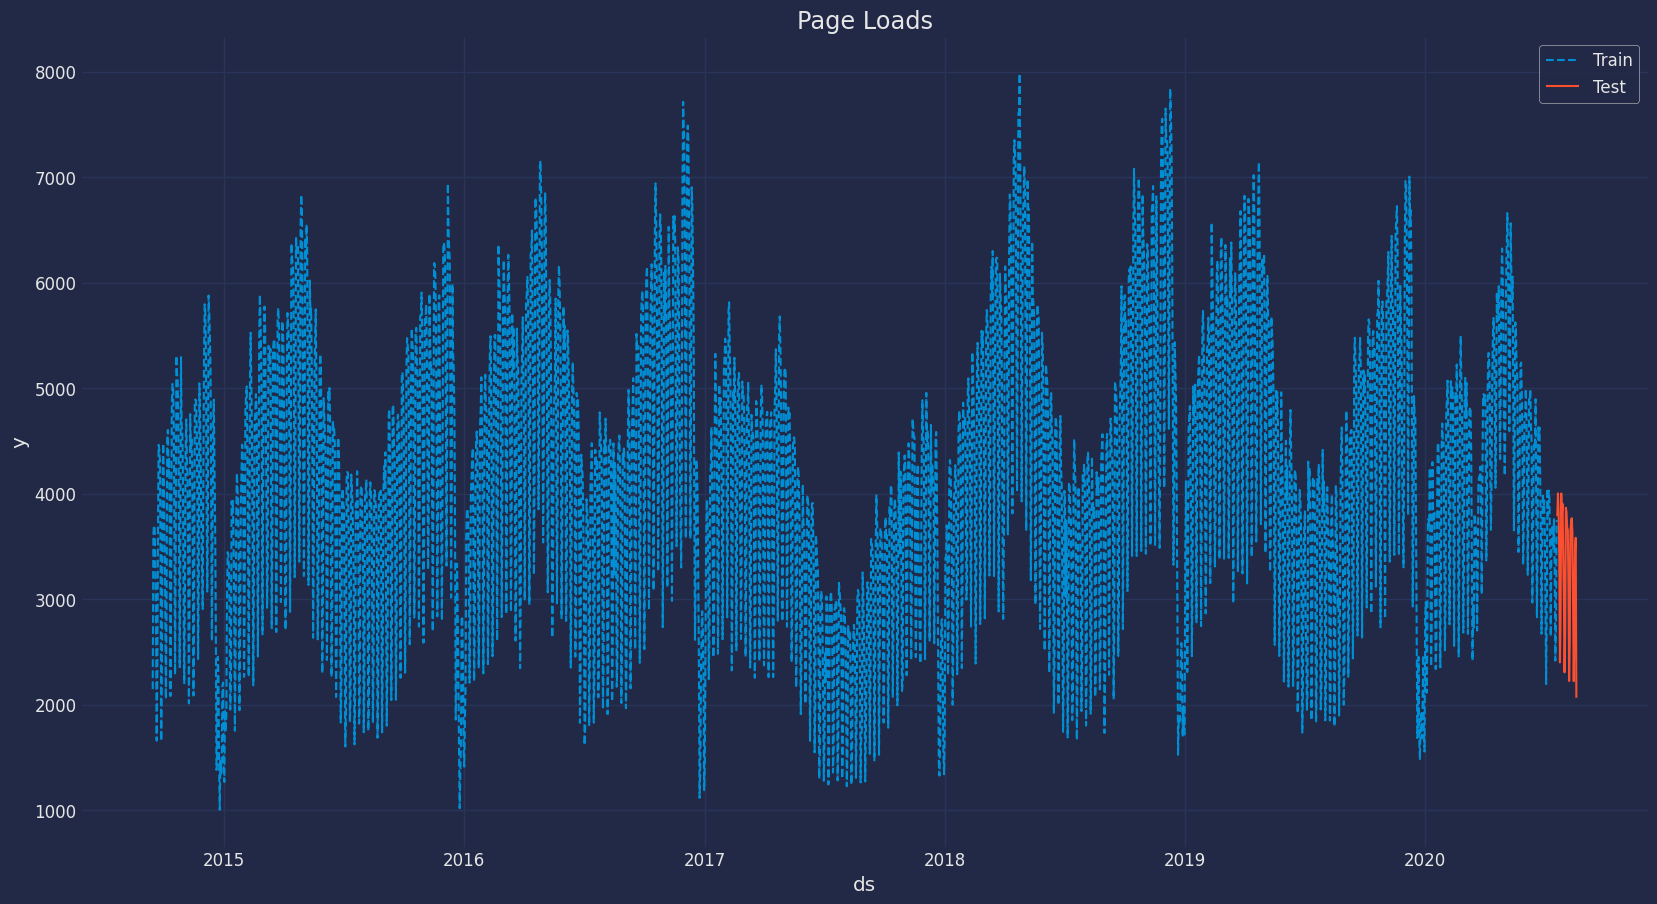

In [28]:
sns.lineplot(df_train,x="ds", y="y", label="Train", linestyle="--")
sns.lineplot(df_test, x="ds", y="y", label="Test")
plt.title("Page Loads");
plt.show()

In [29]:
season_length = 7
sf = StatsForecast(
    models=[mstl, SeasonalNaive(season_length=season_length),
            SeasonalExponentialSmoothingOptimized(season_length=season_length),TBATS(seasonal_periods=season_length)
        ],
    freq="D"
)

In [30]:
sf = sf.fit(df=df_train)
forecasts_test = sf.predict(h=len(df_test))

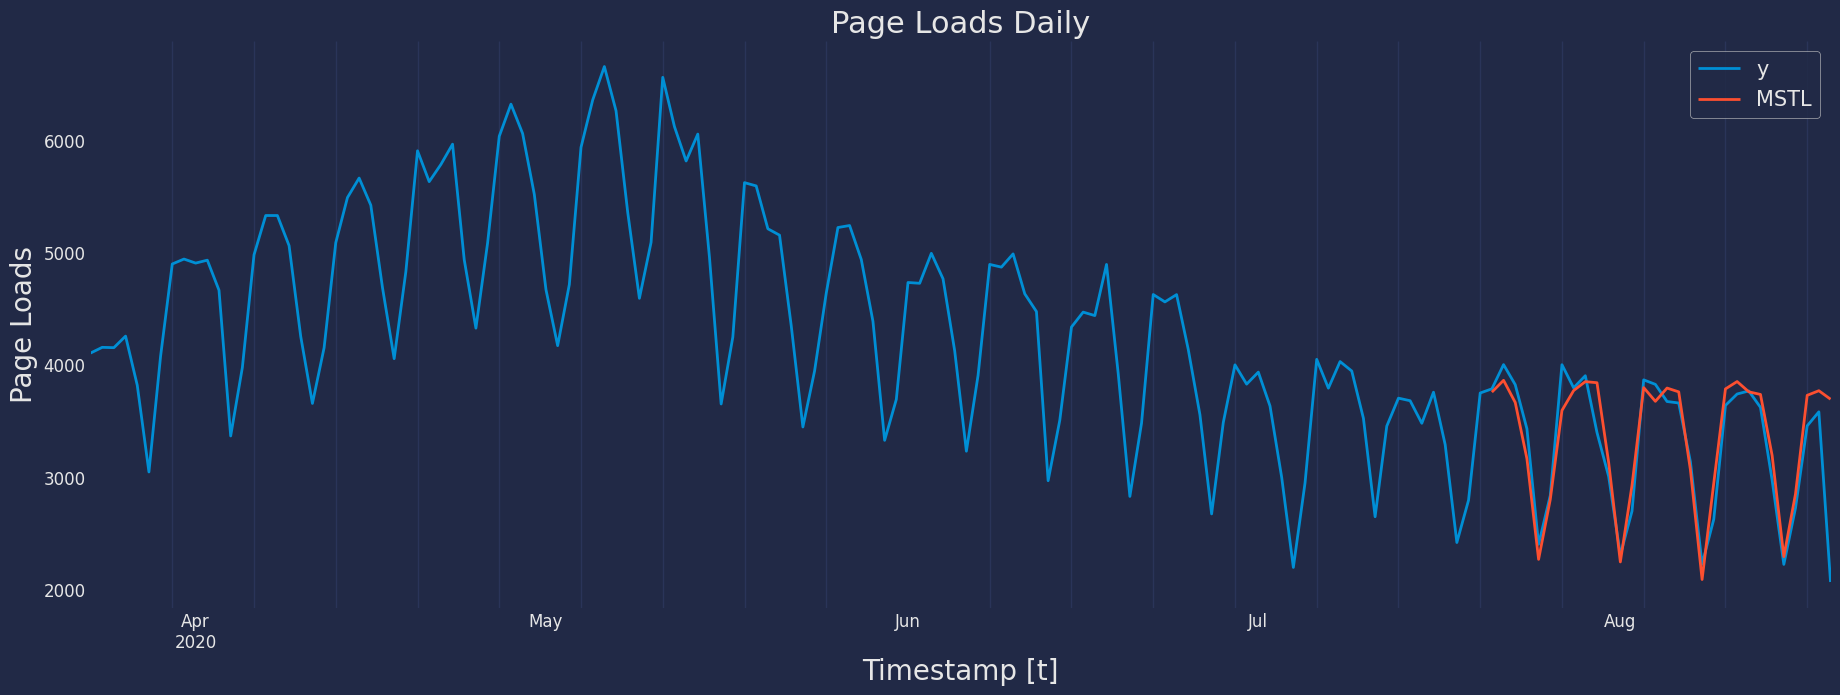

In [31]:
plot_forecasts(df_train, df_test, forecasts_test, models=["MSTL"],target_name="Page Loads")

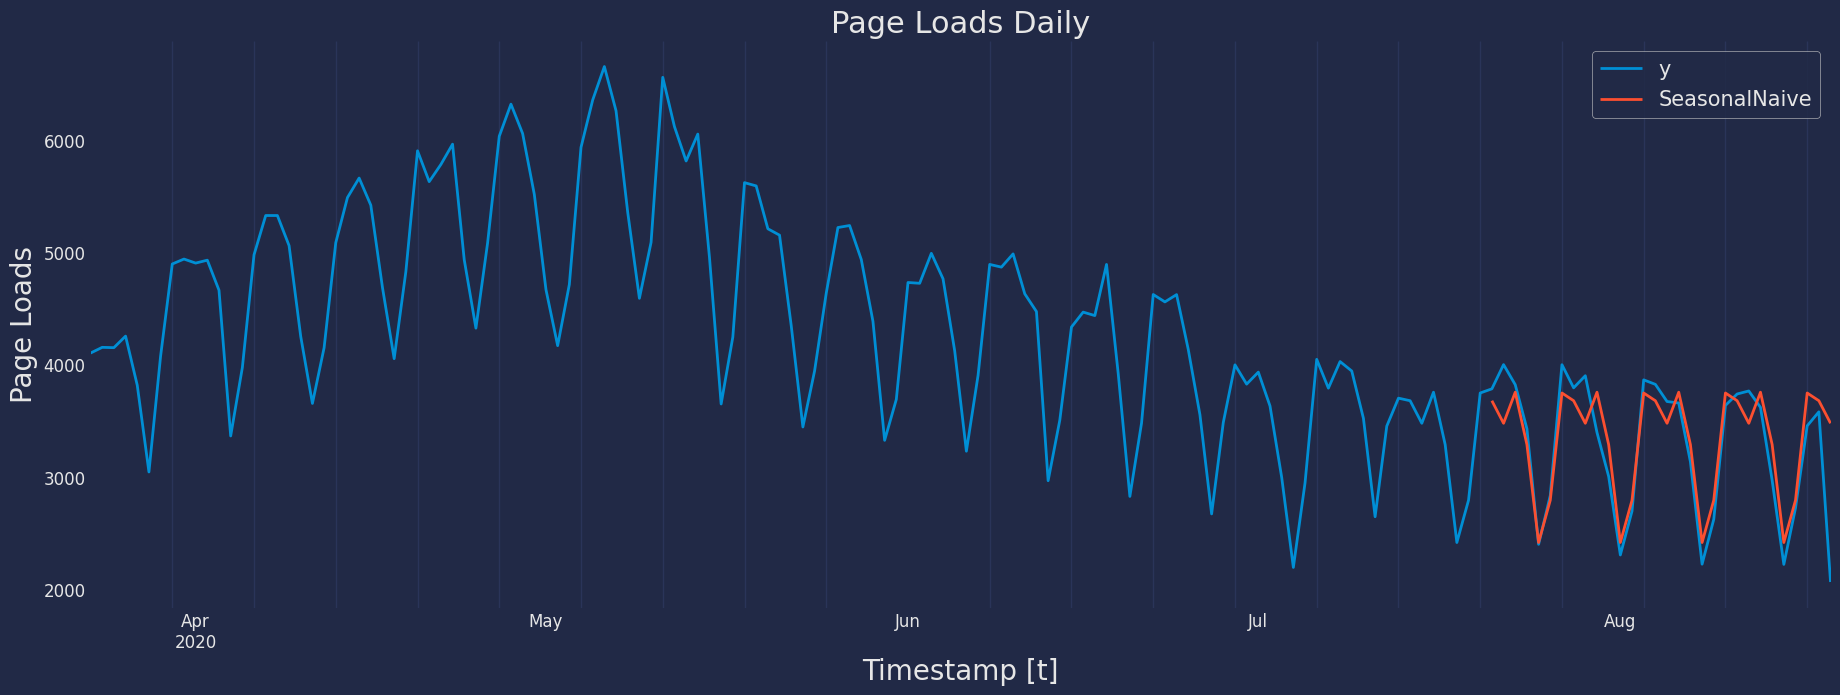

In [32]:
plot_forecasts(df_train, df_test, forecasts_test, models=["SeasonalNaive"],target_name="Page Loads")

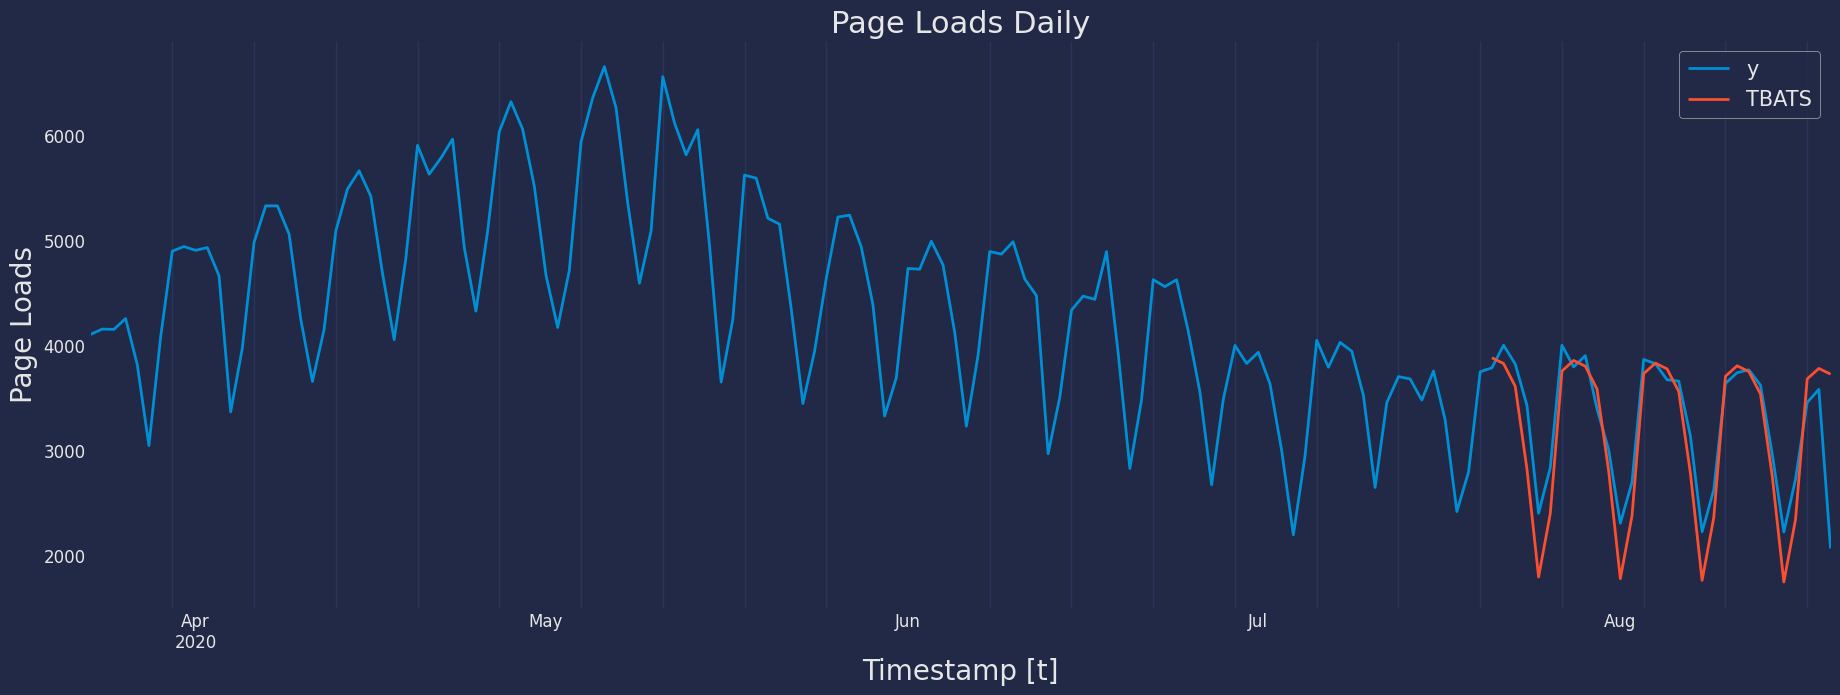

In [33]:
plot_forecasts(df_train, df_test, forecasts_test, models=["TBATS"],target_name="Page Loads")

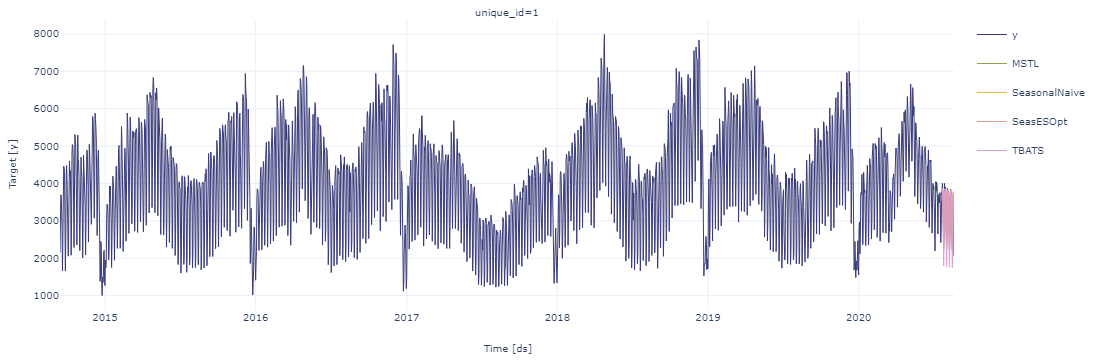

In [34]:
StatsForecast.plot(df_pl_transformed,forecasts_test,engine="plotly")

In [35]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how="left", on=["unique_id", "ds"])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mae, mape, rmse, smape]:
            metric_name=metric.__name__
            evaluation[model][metric_name] = metric(y_true["y"].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [36]:
evaluate_performace(df_train, df_test, forecasts_test, models=["MSTL", "SeasonalNaive","TBATS"])

mae       mape        rmse      smape
MSTL           198.812271   7.122421  348.106628   6.327327
SeasonalNaive  219.633331   7.504589  333.127441   6.895582
TBATS          286.690247  10.712795  419.687073  10.547685